## Amazon Textract Queries

Amazon Textract Queries provides customers the flexibility to easily specify and extract valuable pieces of information that are important for their business process from a document or collection of documents. Customers who know the critical fields they need to extract from a document, can pass that context to Textract Queries. 

Providing this context means, Textract can focus on the parts of the document that are most important and take advantage of visual, spatial, and textual cues to extract the data requested. With this additional context, customers no longer need to lookout for an exact match field name, or maintain a list of synonyms across documents. 

With Textract Queries, customers can extract with high accuracy regardless of the how the data is laid out in a document structure such as forms, tables, and checkboxes, or housed within nested sections within a document.
 
By using Textract Queries, customers do not write additional post-processing code to figure out which key-value or table value corresponds to what they need, or require to train and integrate with custom models to detect the implied fields such as name, and address within the documents or require manual inputs to infer the extracted data. With Textract Queries’s flexibility to specify and extract valuable pieces of information that are important for various stages in a business process, customers can scale up their workflows, drive automation, and efficiencies in the underlying business processes more quickly and easily. 

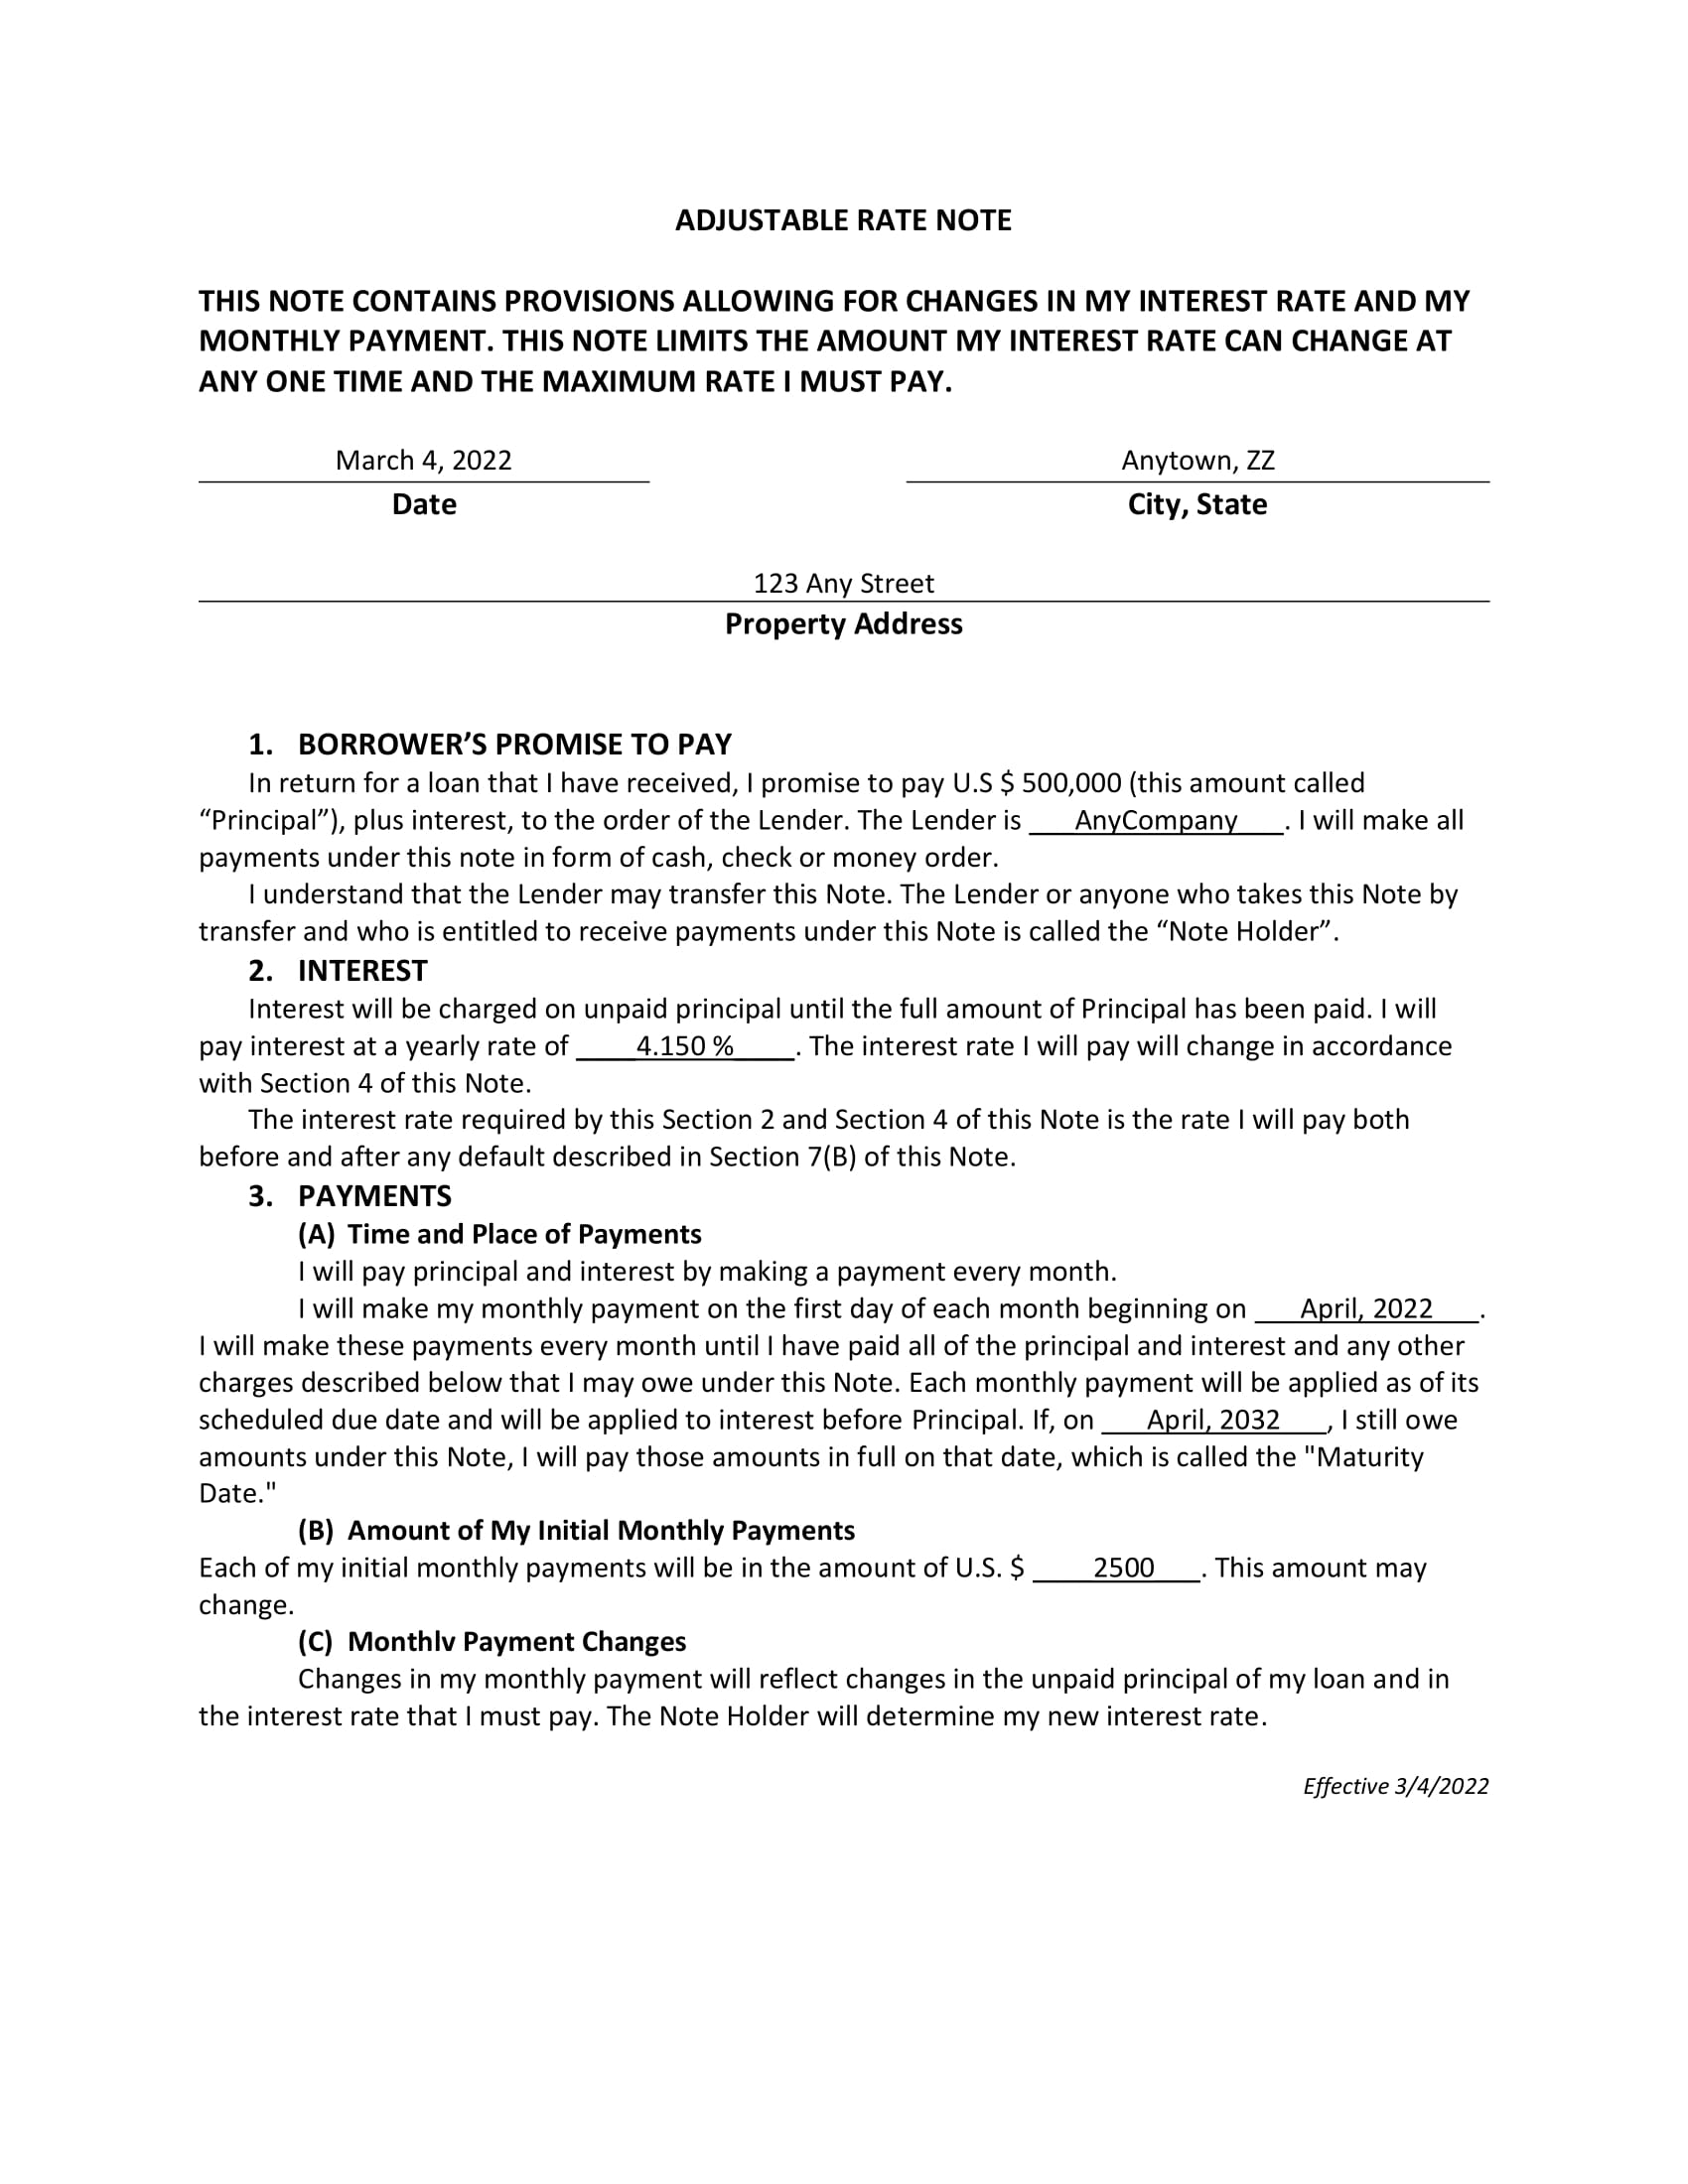

In [1]:
from IPython.display import Image
image_filename = "mortgage-note.jpg"
Image(filename=image_filename)

Install the base framework to call Amazon Textract

In [2]:
!python -m pip install -q boto3 amazon_textract_response_parser

In [3]:
import boto3
import json

#create a Textract Client
textract = boto3.client('textract')
# Document
documentName = image_filename

In [4]:
response = None
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

    # Call Textract
    response = textract.analyze_document(
        Document={'Bytes': imageBytes},
        # new QUERIES Feature Type for Textract Queries
        # We could add additional Feature Types like FORMS and/or TABLES
        # FeatureTypes=["QUERIES", "FORMS", "TABLS"],
        FeatureTypes=["QUERIES"],
        QueriesConfig={
            "Queries": [{
                "Text": "What is the note date?",
                "Alias": "MORTGAGE_NOTE_DATE"
            },
            {
                "Text": "What is the note city and state?",
                "Alias": "MORTGAGE_NOTE_CITY_STATE"
            },
            {
                "Text": "Who is the lender?",
                "Alias": "MORTGAGE_NOTE_LENDER"
            },
            {
                "Text": "What is the interest rate?",
                "Alias": "MORTGAGE_NOTE_INTEREST_RATE"
            },
            {
                "Text": "When does payments begin?",
                "Alias": "MORTGAGE_NOTE_BEGIN_PAYMENTS"
            },
            {
                "Text": "What is the initial monthly payments?",
                "Alias": "MORTGAGE_NOTE_MONTHLY_PAYMENTS"
            },
            {
                "Text": "What is the principal amount borrower has to pay?",
                "Alias": "MORTGAGE_NOTE_PRINCIPAL_PAYMENT"
            },
            {
                "Text": "what is the yearly interest rate?",
                "Alias": "MORTGAGE_NOTE_YEARLY_INTEREST"
            },
            {
                "Text": "When is this document dated?",
                "Alias": "MORTGAGE_NOTE_DOCUMENT_DATE"
            },
            {
                "Text": "What is the beginning date of payment?",
                "Alias": "MORTGAGE_NOTE_BEGIN_DATE_PAYMENT"
            },
            {
                "Text": "When is the Maturity date the borrower has to pay in full?",
                "Alias": "MORTGAGE_NOTE_MATURITY_DATE"
            }
            ]
        })


The response does include all OCR WORDS and LINES, geometry information, confidence scores.

For this demo we just print out the information we did query for.

If we had added the FORMS and/or TABLES Feature Types, the information of those would be part of the response as well, making it easy to add QUERIES to any existing workflow.

In [5]:
# We use tabulate to pretty print the output
!python -m pip install tabulate

In [6]:
import trp.trp2 as t2
from tabulate import tabulate

d = t2.TDocumentSchema().load(response)
page = d.pages[0]

query_answers = d.get_query_answers(page=page)

print(tabulate(query_answers, tablefmt="github"))

|------------------------------------------------------------|----------------------------------|---------------|
| When is this document dated?                               | MORTGAGE_NOTE_DOCUMENT_DATE      | March 4, 2022 |
| What is the note date?                                     | MORTGAGE_NOTE_DATE               | March 4, 2022 |
| When does payments begin?                                  | MORTGAGE_NOTE_BEGIN_PAYMENTS     | April, 2022   |
| Who is the lender?                                         | MORTGAGE_NOTE_LENDER             | AnyCompany    |
| What is the interest rate?                                 | MORTGAGE_NOTE_INTEREST_RATE      | 4.150%        |
| What is the initial monthly payments?                      | MORTGAGE_NOTE_MONTHLY_PAYMENTS   | $ 2500        |
| When is the Maturity date the borrower has to pay in full? | MORTGAGE_NOTE_MATURITY_DATE      | April, 2032   |
| What is the note city and state?                           | MORTGAGE_NOTE_CITY_STATE 

## Conclusion

Textract Query does not require any training and can be used on any document type, even complex ones with high variance in layout across document type like paystubs or bank statements yield high accuracy.

No post processing is required and easy integration with the existing AnalyzeDocument API.

